- KEYWORDS: review




# Reminder on how to get Python help

Use the help function.



In [1]:
from scipy.optimize import fsolve

help(fsolve)

Help on function fsolve in module scipy.optimize.minpack:

fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
    Find the roots of a function.
    
    Return the roots of the (non-linear) equations defined by
    ``func(x) = 0`` given a starting estimate.
    
    Parameters
    ----------
    func : callable ``f(x, *args)``
        A function that takes at least one (possibly vector) argument.
    x0 : ndarray
        The starting estimate for the roots of ``func(x) = 0``.
    args : tuple, optional
        Any extra arguments to `func`.
    fprime : callable(x), optional
        A function to compute the Jacobian of `func` with derivatives
        across the rows. By default, the Jacobian will be estimated.
    full_output : bool, optional
        If True, return optional outputs.
    col_deriv : bool, optional
        Specify whether the Jacobian function computes derivatives down
        th


# A Mathematics Review


## Solving algebraic equations

Solve the equation $x^2 = 3$ for $x$.

This is an algebraic equation that is nonlinear in $x$. So, we use fsolve. To do that we need to define a function that will be equal to zero at the solution. We get that with this equation:

$0 = 3 - x^2$



In [23]:
def objective(x):
    return 3 - x**2

We need to provide a guess for fsolve. An easy way to get a guess is to graph the function.



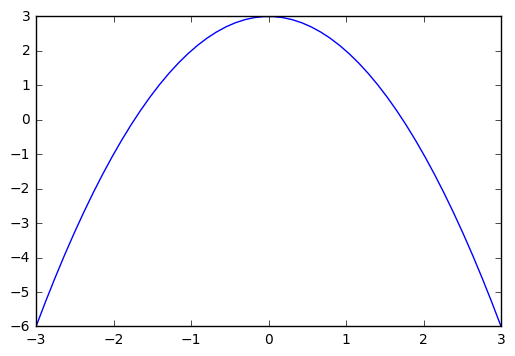

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(-3, 3)
Y = objective(X)

plt.plot(X, Y)

You should see in this graph that the objective function passes through zero around 1.7. We use that to make a guess in fsolve.



In [25]:
from scipy.optimize import fsolve

ans, = fsolve(objective, 0)
print(ans)
print(objective(1))

0.0
2


/Users/jkitchin/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [30]:
fsolve(objective, 0.000, full_output=1)

(array([ 0.]),
 {'fjac': array([[-1.]]),
  'fvec': array([ 3.]),
  'nfev': 13,
  'qtf': array([-3.]),
  'r': array([ -6.50097787e-20])},
 5,
 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.')

In [37]:
ans = fsolve(objective, 2)
print('{:1.2f}'.format(float(ans)))

1.73



# Solving an integral

Evaluate the integral: $\int_0^\pi sin(x) dx$. This is a definite integral so we use quad.



In [41]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
        If the user desires improved integration performance, then f may
        instead be a ``ctypes`` function of the form:
    
            f(int n, double args[n]),
    
        where ``args`` is an array of function arguments and ``n`` is the
        length of ``args``. ``f.argtypes`` should be set to
        ``(c_int, c_double)``, and ``f.restype`` should be ``(c_double,)``.
    a : float
     

In [42]:
from scipy.integrate import quad

def integrand(x):
    return np.sin(x)

ans, err = quad(integrand, 0, np.pi)

print(ans, err)

2.0 2.220446049250313e-14



# Differential equations

Solve the differential equation $\frac{dy}{dx} = \frac{1}{x + 0.1}$ from $x=0$ to $x=1$ if $y(x=0) = 1$ and plot your solution.

This problem states a differential equation in standard form: $y'(x) = f(x, y)$. We are given an initial condition, and a range to find the function $y(x)$ over. For this problem, we use odeint. We have to:

1.  define a function for the right hand side of the ODE
2.  Define an array for the range we solve/integrate over



In [43]:
def ode(y, x):
    return 1 / (x + 0.1)

Here we define an integration range.



In [44]:
xspan = np.linspace(0, 1)

And now we get the solution.



In [46]:
from scipy.integrate import odeint

y0 = 1
sol = odeint(ode, y0, xspan)

In [47]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y, t0, ...)
    
    where y can be a vector.
    
    *Note*: The first two arguments of ``func(y, t0, ...)`` are in the
    opposite order of the arguments in the system definition function used
    by the `scipy.integrate.ode` class.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        

And finally plot it.



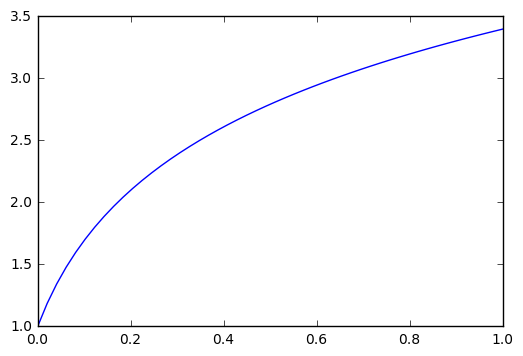

In [48]:
plt.plot(xspan, sol)


# The algorithm we use for almost every problem

1.  The mole balance and design equation
    
    Three basic kinds of reactors: batch, CSTR, PFR/PBR
    A few special kinds: semibatch

2.  Rate law - an algebraic expression for the rate of each reaction

3.  Stoichiometry - determines the species specific net rates, and concentrations
    e.g $C_A = F_A / \nu$.

4.  Combine - to get a fully specified mathematical problem

5.  Evaluate - using fsolve, odeint


## Example

Find the volume required to reach 90% conversion of A for the elementary gas phase reaction

$2A + B \rightarrow C$ which takes place in a CSTR at constant temperature (500 K) and constant pressure (16.4 atm). The feed is equal molar in A and B, and A is fed at 5 mol/s. The rate constant for this reaction is reported to be 10 (L/mol)<sup>2</sup>/s.

R = 0.082 atm L / (mol K)

1.  The mole balance/design equation. We have a CSTR, so we choose: $V = \frac{F_{A0} X}{-r_A}$.

2.  The rate law. The reaction is specified as elementary. That means: $r_A = k C_A^2 C_B$. We use the stoichiometry as the reaction is written. Note we have a gas-phase reaction with changing moles, so we have to compute: $C_A = F_A / \nu$ with $\nu = \nu_0 F_T / F_{T0}$. The total molar flow rates involve all three species.

$F_T = F_A + F_B + F_C$

and 

$F_{T0} = F_{A0} + F_{B0}$

There is no C flowing into this reactor.

1.  Stoichiometry. We want 90% conversion on A, so we renormalize the reaction to be: $A + 1/2 B \rightarrow 1/2 C$. This leads us to these molar flows:

$F_A = F_{A0} - F_{A0} X$

$F_B = F_{B0} - 0.5 * F_{A0} X$

$F_C = F_{C0} + 0.5 * F_{A0} X$

1.  We combine these into a fully formulated problem and then evaluate it.

Let's work this out, nearly from scratch.



In [57]:
# Given data
Fa0 = Fb0 = 5 # mol / s
Fc0 = 0

ya0 = 0.5 # mole fraction of A in the feed
P0 = 16.4  # atm
T0 = 500 # K
R = 0.082 # atm L / mol / K

Ca0 = ya0 * P0 / R / T0
v0  = Fa0 / Ca0

k = 10 # (L/mol)^2/s
X = 0.9

Ft0 = Fa0 + Fb0

# stoichiometry
Fa = Fa0 - Fa0 * X
Fb = Fb0 - 0.5 * Fa0 * X
Fc = Fc0 + 0.5 * Fa0 * X

Ft = Fa + Fb + Fc

nu = v0 * Ft / Ft0

Ca = Fa / nu
Cb = Fb / nu

# rate law
ra = -k * Ca**2 * Cb

# design equation
V = Fa0 * X / -ra
print('The volume is {:1.0f} L'.format(V))

def objective(V):
    return Fa0 - Fa + V * ra

print(fsolve(objective, 1700))

The volume is 1702 L
[ 1701.5625]


Now solve this again, assuming a PFR.

The integral design equation is:

$V = \int_{0}^{X}\frac{Fa0 dX}{-ra}$


In [59]:
def integrand(X):
    
    # stoichiometry
    Fa = Fa0 - Fa0 * X
    Fb = Fb0 - 0.5 * Fa0 * X
    Fc = Fc0 + 0.5 * Fa0 * X
    
    Ft = Fa + Fb + Fc
    
    nu = v0 * Ft / Ft0
    
    Ca = Fa / nu
    Cb = Fb / nu
    
    # rate law
    ra = -k * Ca**2 * Cb
    
    # design equation
    return Fa0 / -ra

ans, err = quad(integrand, 0, 0.9)
print(ans)

226.64328415606423
